In [1]:
import numpy as np

import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt

np.random.seed(42)

Using Numpy backend.


In [3]:
inputLength = 1000
trainingLength = int(inputLength*0.7)
data = np.linspace(0, 10*np.pi, inputLength).reshape(-1,1)

inputData = np.sin(data)
outputData = np.cos(data)

inputDataTraining = inputData[:trainingLength]
inputDataValidation = inputData[trainingLength:]

outputDataTraining = outputData[:trainingLength]
outputDataValidation = outputData[trainingLength:]

## (Repeated) One Step Prediction

In [4]:
esn = PredictionESN(n_input=1, n_output=1, n_reservoir=50, leakingRate=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=False)

In [5]:
esn.fit(inputDataTraining, outputDataTraining, transientTime="Auto", verbose=1)

100% (616 of 616) |###############################################################| Elapsed Time: 0:00:00 Time: 0:00:00


0.0073178009529016414

In [6]:
one_step_prediction = esn.predict(inputDataValidation)

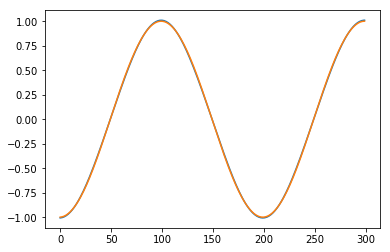

In [7]:
plt.plot(one_step_prediction.T[0, :])
plt.plot(outputDataValidation)
plt.show()

## Generative task

In [8]:
esn = PredictionESN(n_input=0, n_output=1, n_reservoir=50, leakingRate=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=True)

In [9]:
esn.fit(None, inputDataTraining, transientTime=100, verbose=1)

100% (600 of 600) |###############################################################| Elapsed Time: 0:00:00 Time: 0:00:00


0.0024808445260868848

In [10]:
generation = esn.generate(n=len(inputDataValidation), inputData=None, initialOutputData=inputDataTraining[-1])

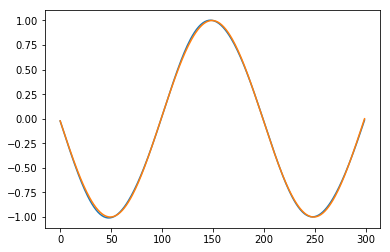

In [11]:
plt.plot(generation[0, :])
plt.plot(inputDataValidation)
plt.show()